In [2]:
import pandas as pd;
import numpy as np
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
def generate_images(image , directory_name,prefix_name):
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    img = np.expand_dims(img, axis=0)


    datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
    

    output_dir = directory_name  
    os.makedirs(output_dir, exist_ok=True)


    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir=output_dir, save_prefix=prefix_name,save_format='jpg'):
        i += 1
        if i >= 100:
            break

In [6]:
generate_images('img1.jpg','5_circle','5_img')
generate_images('img2.jpg','3_circle','3_img')
generate_images('img3.jpg','2_circle','2_img')
generate_images('img4.jpg','4_circle','4_img')

In [2]:
two_enemy = r'C:\Users\ishug\OneDrive\Desktop\drone project\Detect circle\2_circle'
three_enemy = r'C:\Users\ishug\OneDrive\Desktop\drone project\Detect circle\3_circle'
four_enemy = r'C:\Users\ishug\OneDrive\Desktop\drone project\Detect circle\4_circle'
five_enemy  = r'C:\Users\ishug\OneDrive\Desktop\drone project\Detect circle\5_circle'
two_enemy_folder = os.listdir(two_enemy)
three_enem_folder = os.listdir(three_enemy)
four_enemy_folder = os.listdir(four_enemy)
five_enemy_folder = os.listdir(five_enemy)

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def  plot_images(folder_name, directories,name):
   for i in folder_name:
     img = mpimg.imread(os.path.join(directories, i))
     print("Shape of the image is: ",img.shape)
     plt.imshow(img)
     plt.title(name+" Enemy")
     plt.show()
     break

Shape of the image is:  (480, 640, 3)


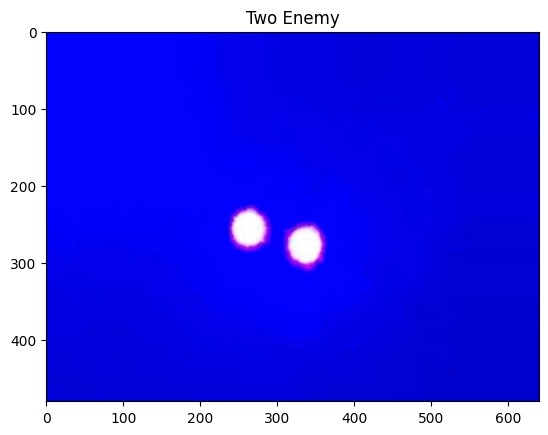

In [12]:
plot_images(two_enemy_folder,two_enemy,"Two")

Shape of the image is:  (480, 640, 3)


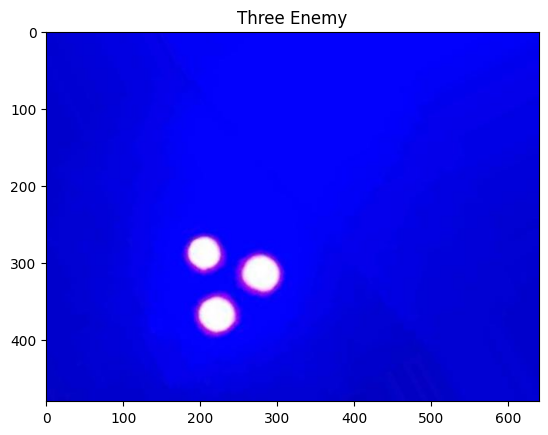

In [13]:
plot_images(three_enem_folder,three_enemy,"Three")

Shape of the image is:  (480, 640, 3)


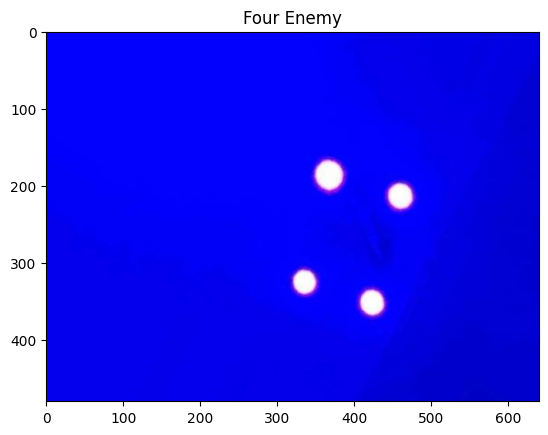

In [14]:
plot_images(four_enemy_folder,four_enemy,"Four")

Shape of the image is:  (480, 640, 3)


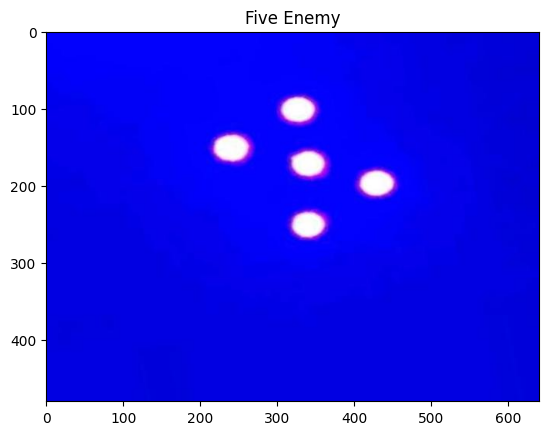

In [15]:
plot_images(five_enemy_folder,five_enemy,"Five")

In [17]:
from PIL import Image
dataset = []
labels = []
def generate_dataset(folder_name,file_name,label):
    for i in folder_name:
       img = Image.open(os.path.join(file_name, i))
       img = img.resize((64,64))
       img_array = np.array(img)
       dataset.append(img_array)
       labels.append(label)


In [18]:
generate_dataset(two_enemy_folder,two_enemy,0)
#----------------------------------------------------#
generate_dataset(three_enem_folder,three_enemy,1)
#----------------------------------------------------#
generate_dataset(four_enemy_folder,four_enemy,2)
#----------------------------------------------------#
generate_dataset(five_enemy_folder,five_enemy,3)

In [19]:
print("Length of Datasets: ",len(dataset))
print("Length of label: ",len(labels))

Length of Datasets:  400
Length of label:  400


In [20]:
dataset[0]

array([[[  2,   1, 253],
        [  2,   1, 253],
        [  2,   1, 253],
        ...,
        [  1,   0, 216],
        [  1,   0, 216],
        [  1,   0, 216]],

       [[  2,   1, 253],
        [  2,   1, 253],
        [  2,   1, 253],
        ...,
        [  1,   0, 216],
        [  1,   0, 216],
        [  1,   0, 216]],

       [[  2,   1, 253],
        [  2,   1, 253],
        [  2,   1, 253],
        ...,
        [  1,   0, 216],
        [  1,   0, 216],
        [  1,   0, 216]],

       ...,

       [[  1,   0, 215],
        [  1,   0, 215],
        [  1,   0, 215],
        ...,
        [  0,   0, 204],
        [  0,   0, 204],
        [  0,   0, 204]],

       [[  1,   0, 216],
        [  1,   0, 216],
        [  1,   0, 214],
        ...,
        [  0,   0, 204],
        [  0,   0, 204],
        [  0,   0, 204]],

       [[  1,   0, 216],
        [  1,   0, 216],
        [  1,   0, 214],
        ...,
        [  0,   0, 204],
        [  0,   0, 204],
        [  0,   0, 204]]

In [21]:
labels[0]

0

In [22]:
dataset = np.array(dataset)
labels = np.array(labels)

In [23]:
from sklearn.model_selection import train_test_split
#splitting into train and test in 80 - 20 ratio
x_train,x_test,y_train,y_test = train_test_split(dataset,labels, test_size = 0.2,random_state = 42)

In [24]:
x_train

array([[[[  2,   1, 253],
         [  2,   1, 253],
         [  2,   1, 253],
         ...,
         [  0,   0, 219],
         [  1,   0, 216],
         [  1,   0, 216]],

        [[  2,   1, 253],
         [  2,   1, 253],
         [  2,   1, 253],
         ...,
         [  0,   0, 218],
         [  1,   0, 216],
         [  1,   0, 216]],

        [[  2,   1, 253],
         [  2,   1, 253],
         [  2,   1, 253],
         ...,
         [  1,   1, 219],
         [  0,   1, 216],
         [  0,   1, 216]],

        ...,

        [[  1,   0, 213],
         [  1,   0, 213],
         [  1,   1, 212],
         ...,
         [  0,   0, 204],
         [  0,   0, 208],
         [  1,   1, 211]],

        [[  1,   1, 210],
         [  1,   1, 210],
         [  1,   1, 210],
         ...,
         [  0,   0, 204],
         [  0,   0, 206],
         [  1,   1, 212]],

        [[  1,   0, 214],
         [  1,   0, 214],
         [  1,   0, 214],
         ...,
         [  0,   0, 204],
        

In [25]:
x_train.shape

(320, 64, 64, 3)

In [26]:
y_train

array([0, 0, 2, 2, 2, 0, 2, 3, 1, 0, 2, 3, 1, 2, 1, 3, 3, 3, 2, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 3, 3, 1, 3, 2, 3, 2, 0, 0, 2, 3, 2, 1, 1, 0, 3,
       0, 1, 3, 3, 1, 2, 3, 1, 2, 1, 1, 1, 2, 2, 2, 3, 0, 1, 2, 1, 1, 2,
       0, 1, 1, 3, 0, 3, 2, 1, 0, 1, 1, 0, 3, 3, 3, 2, 2, 1, 3, 0, 3, 1,
       1, 2, 0, 0, 1, 0, 1, 3, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 3, 2, 3, 1,
       1, 1, 3, 0, 3, 3, 3, 3, 3, 3, 1, 2, 2, 2, 2, 1, 0, 0, 3, 1, 2, 1,
       1, 3, 2, 1, 3, 2, 3, 2, 3, 1, 2, 1, 1, 1, 1, 3, 0, 2, 1, 2, 2, 0,
       1, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 3, 1, 2, 2, 1, 2, 1, 2, 0, 3,
       0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 3, 2, 2, 0, 0, 2, 2, 3, 1, 0, 3, 2,
       2, 3, 0, 2, 3, 1, 2, 3, 2, 1, 0, 2, 0, 0, 0, 2, 2, 3, 0, 3, 2, 2,
       2, 1, 3, 1, 0, 1, 1, 0, 0, 3, 0, 1, 0, 3, 3, 2, 2, 3, 2, 2, 2, 2,
       3, 2, 3, 3, 3, 2, 2, 1, 0, 2, 1, 3, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0,
       3, 0, 3, 2, 2, 0, 3, 0, 2, 1, 3, 3, 1, 3, 3, 3, 2, 0, 0, 1, 1, 3,
       1, 1, 0, 0, 3, 2, 2, 0, 3, 1, 2, 1, 2, 3, 2,

In [27]:
y_train.shape

(320,)

In [28]:
x_test.shape

(80, 64, 64, 3)

In [29]:
y_test.shape

(80,)

In [30]:
from keras.utils import to_categorical
#normalize the data
x_train = x_train/255  
x_test = x_test/255
y_train = to_categorical(y_train, num_classes=4, dtype='uint8')
y_test = to_categorical(y_test, num_classes=4, dtype='uint8')

In [31]:
y_train

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0]], dtype=uint8)

In [32]:
x_train

array([[[[0.00784314, 0.00392157, 0.99215686],
         [0.00784314, 0.00392157, 0.99215686],
         [0.00784314, 0.00392157, 0.99215686],
         ...,
         [0.        , 0.        , 0.85882353],
         [0.00392157, 0.        , 0.84705882],
         [0.00392157, 0.        , 0.84705882]],

        [[0.00784314, 0.00392157, 0.99215686],
         [0.00784314, 0.00392157, 0.99215686],
         [0.00784314, 0.00392157, 0.99215686],
         ...,
         [0.        , 0.        , 0.85490196],
         [0.00392157, 0.        , 0.84705882],
         [0.00392157, 0.        , 0.84705882]],

        [[0.00784314, 0.00392157, 0.99215686],
         [0.00784314, 0.00392157, 0.99215686],
         [0.00784314, 0.00392157, 0.99215686],
         ...,
         [0.00392157, 0.00392157, 0.85882353],
         [0.        , 0.00392157, 0.84705882],
         [0.        , 0.00392157, 0.84705882]],

        ...,

        [[0.00392157, 0.        , 0.83529412],
         [0.00392157, 0.        , 0.83529412]

In [33]:
from tensorflow.keras import layers, models

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation ='relu',input_shape=(64,64,3)))   # 32 is the number of filter, (3,3) filter size , activation function is relu because relu generally did not have vanishing gradient
model.add(layers.MaxPooling2D(2,2))                                          # (64,64,3) is the image is size with 3

model.add(layers.Conv2D(64,(3,3),activation ='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation ='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation ='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0

In [36]:
model.add(layers.Flatten()) # flatten the layer so model able to take the input
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.3)) # to reduce the overfitting
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(4,activation = 'softmax')) # it is multi class classfication so we use softmax activation function

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0

In [38]:
import tensorflow as tf
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])


In [42]:
history = model.fit(x_train,y_train, batch_size = 32 ,verbose=2,epochs = 40,validation_data = (x_test,y_test))

Epoch 1/40
10/10 - 1s - loss: 0.8540 - accuracy: 0.6250 - val_loss: 0.7294 - val_accuracy: 0.7250 - 1s/epoch - 109ms/step
Epoch 2/40
10/10 - 1s - loss: 0.7490 - accuracy: 0.6500 - val_loss: 0.5729 - val_accuracy: 0.8500 - 658ms/epoch - 66ms/step
Epoch 3/40
10/10 - 1s - loss: 0.6911 - accuracy: 0.7188 - val_loss: 0.4692 - val_accuracy: 0.8500 - 586ms/epoch - 59ms/step
Epoch 4/40
10/10 - 1s - loss: 0.5942 - accuracy: 0.7406 - val_loss: 0.4254 - val_accuracy: 0.8625 - 663ms/epoch - 66ms/step
Epoch 5/40
10/10 - 1s - loss: 0.4174 - accuracy: 0.8250 - val_loss: 0.3280 - val_accuracy: 0.8875 - 625ms/epoch - 63ms/step
Epoch 6/40
10/10 - 1s - loss: 0.4207 - accuracy: 0.8094 - val_loss: 0.3246 - val_accuracy: 0.9125 - 644ms/epoch - 64ms/step
Epoch 7/40
10/10 - 1s - loss: 0.3051 - accuracy: 0.8969 - val_loss: 0.2807 - val_accuracy: 0.9000 - 652ms/epoch - 65ms/step
Epoch 8/40
10/10 - 1s - loss: 0.2760 - accuracy: 0.9031 - val_loss: 0.2127 - val_accuracy: 0.9250 - 597ms/epoch - 60ms/step
Epoch 9/40

In [43]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print("Training Accuracy:", train_accuracy[-1] * 100)
print("Validation Accuracy:", val_accuracy[-1] * 100)

Training Accuracy: 97.81249761581421
Validation Accuracy: 96.24999761581421


3/3 - 0s - loss: 0.2211 - accuracy: 0.9625 - 82ms/epoch - 27ms/step


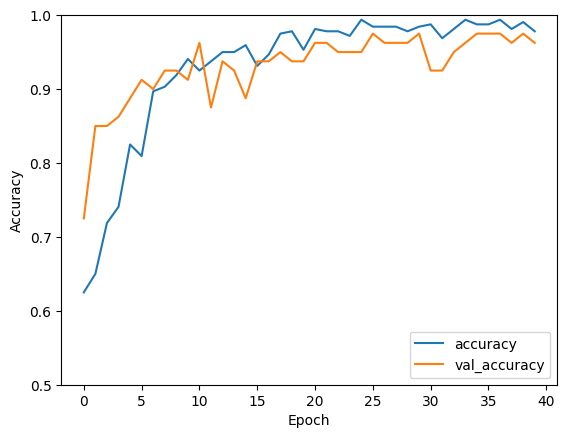

In [44]:
plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)


In [45]:
model.save("Detect_Enemy.h5")

c:\Users\ishug\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
import tensorflow as tf
from PIL import Image
def convert_into_pixel(img):
  img = img.resize((64,64))
  img_pixel = np.array(img)

  img_pixel = img_pixel / 255

  return img_pixel

#user input
model = tf.keras.models.load_model('Detect_Enemy.h5')
img  = Image.open("img3.jpg")

converted_img = convert_into_pixel(img)

prediction =  model.predict(np.expand_dims(converted_img,axis = 0))
predicted_class = np.argmax(prediction)

if(predicted_class == 0):
  print("Two Enemy")
elif predicted_class == 1:
  print("Three Enemy")
elif predicted_class == 2:
  print("Four Enemy")
elif predicted_class == 3:
  print("Five Enemy")



1/1 [==============================] - 0s 124ms/step
Two Enemy
